In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
header_ = ["ID", "AGE", "SEX", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "IBS_NASL", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr11", "nr01", "nr02", "nr03", "nr04", "nr07", "nr08", "np01", "np04", "np05", "np07", "np08", "np09", "np10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "S_AD_KBRIG", "D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "K_BLOOD", "GIPER_Na", "Na_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", "L_BLOOD", "ROE", "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"]
print(len(header_))
df = pd.read_csv("MI.data", index_col=0, names=header_)
# Replace to NaN and convert to float
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric)

124


In [3]:
def clean_missing(data, max_row=20, max_col=30):
    col_missing = (100*data.isna().sum())/data.shape[0]
    names_dropped = list(data.loc[:, ((100*data.isna().sum())/data.shape[0])>max_col])
    data = data.loc[:, ((100*data.isna().sum())/data.shape[0])<=max_col]
    data = data.loc[((100*data.isna().sum(axis=1))/data.shape[1])<=max_row, :]
    return data, names_dropped

In [4]:
df, name_dropped = clean_missing(data=df)
print(df.shape)

(1572, 116)


In [5]:
## Impute the missing values with KNN-impute

In [6]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

def impute_missing(df):

    scaler = preprocessing.StandardScaler()

    pipe = make_pipeline(scaler, KNNImputer(n_neighbors=10))

    df_i = pipe.fit_transform(df)
    df_i = scaler.inverse_transform(df_i)

    sf_df = pd.DataFrame(df_i, index=df.index, columns=df.columns)
    return sf_df

In [7]:
sf_df = impute_missing(df)

In [8]:
numeric_attributes = ["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD",
                      "ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]

numeric_attributes = [x for x in numeric_attributes if x not in name_dropped]

ord_attributes = ["INF_ANAM","STENOK_AN","FK_STENOK","IBS_POST","GB","DLIT_AG","ZSN_A",
                  "ant_im","lat_im","inf_im","post_im","R_AB_1_n","NA_R_1_n","NOT_NA_1_n",
                 "R_AB_2_n","NA_R_2_n","NOT_NA_2_n","R_AB_3_n","NA_R_3_n","NOT_NA_3_n","TIME_B_S"]


ord_attributes = [x for x in ord_attributes if x not in name_dropped]

Y_labels = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS"]

att_names = list(df.columns)

bin_attributes = [x for x in att_names if x not in numeric_attributes+ord_attributes+Y_labels]
bin_attributes = [x for x in bin_attributes if x not in name_dropped]

In [9]:
sf_df[ord_attributes]= sf_df[ord_attributes].apply(round,axis=1)

In [10]:
sf_df[bin_attributes]= sf_df[bin_attributes].apply(round,axis=1)

In [11]:
sf_df_dum = pd.get_dummies(sf_df, columns=ord_attributes)

In [12]:
x_cols = bin_attributes+ord_attributes+numeric_attributes
y_cols = Y_labels
x_cols = [x for x in sf_df_dum.columns if x not in Y_labels]

In [13]:
X = sf_df_dum[x_cols]
Y = sf_df_dum[y_cols]
translate_dict = {0: "Alive", 1: "Cardiogenic shock", 2: "Pulmonary edema", 3: "Myocardial rupture", 4: "Progress of congestive heart failure",
                5: "Thromboembolism", 6: "Asystole", 7: "Ventricular fibrillation"}
Y["Translated_labels"] = Y["LET_IS"]
Y = Y.replace({"Translated_labels": translate_dict})
full_set = sf_df_dum[x_cols+y_cols]
Y["DEAD"] = Y["LET_IS"].apply(lambda x: 1 if x > 0 else 0)

from imblearn.over_sampling import RandomOverSampler, SMOTE
#scaler = preprocessing.StandardScaler()
#scaler.fit(full_set)
#X_sc = scaler.transform(full_set)
Y_dead = Y["DEAD"].to_numpy().astype(int)
smo = SMOTE()
x_sampled, y_sampled = smo.fit_resample(full_set, Y_dead)
x_train = x_sampled[x_cols]
x_sampled["LET_IS"] = x_sampled["LET_IS"].round(0).astype(int)
x_sampled["Translated_labels"] = x_sampled["LET_IS"]
y_train = x_sampled.replace({"Translated_labels": translate_dict})
print(y_train)


            AGE       SEX  SIM_GIPERT      nr11  nr01  nr02  nr03  nr04  nr07  \
0     77.000000  1.000000    0.000000 -0.000000   0.0   0.0   0.0   0.0   0.0   
1     55.000000  1.000000    0.000000 -0.000000   0.0   0.0   0.0   0.0   0.0   
2     52.000000  1.000000    0.000000 -0.000000   0.0   0.0   0.0   0.0   0.0   
3     68.000000  0.000000    0.000000 -0.000000   0.0   0.0   0.0   0.0   0.0   
4     60.000000  1.000000    0.000000 -0.000000   0.0   0.0   0.0   0.0   0.0   
...         ...       ...         ...       ...   ...   ...   ...   ...   ...   
2641  55.850437  1.000000    0.429913  0.000000   0.0   0.0   0.0   0.0   0.0   
2642  83.419009  0.105399    0.000000  0.105399   0.0   0.0   0.0   0.0   0.0   
2643  78.419469  0.000000    0.552434  0.000000   0.0   0.0   0.0   0.0   0.0   
2644  67.731298  0.567176    0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   
2645  64.134423  0.000000    0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   

      nr08  ...  FIBR_JELUD

/home/alfred/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
def make_2d_graphs(X, labels, dimensions, title, xlabel, ylabel):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel(ylabel, fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = ["Alive", "Cardiogenic shock", "Pulmonary edema", "Myocardial rupture", "Progress of congestive heart failure",
                "Thromboembolism", "Asystole", "Ventricular fibrillation"]
    colors = ['r', 'g', 'b', "y", "m", "c", "k"]
    for target, color in zip(targets,colors):
        indicesToKeep = labels["Translated_labels"] == target
        print(X[indicesToKeep, dimensions[0]].flatten("K").shape, X[indicesToKeep, dimensions[1]].flatten("K").shape)
        ax.scatter(X[indicesToKeep, dimensions[0]].tolist()
                   , X[indicesToKeep, dimensions[1]].tolist()
                   , c = color, alpha=0.5)
    ax.legend(targets)
    ax.grid()
    
def hist(x, labels=["Alive", "Cardiogenic shock", "Pulmonary edema", "Myocardial rupture", "Progress of congestive heart failure",
                "Thromboembolism", "Asystole", "Ventricular fibrillation"]):
    keys, counts = np.unique(x, return_counts=True)
    plt.bar(keys,counts)
    plt.xticks(rotation=90)
    plt.show()

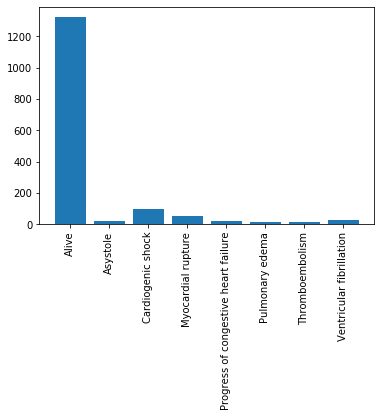

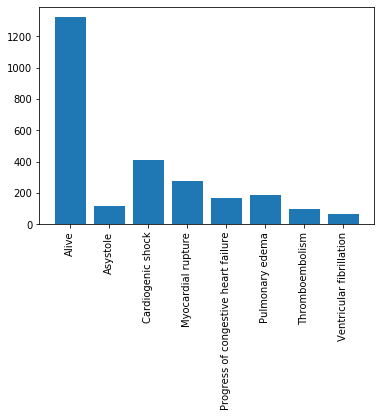

In [15]:
hist(Y["Translated_labels"])
hist(y_train["Translated_labels"])

In [16]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler

def center_data(X):
    mu = np.mean(X.T, axis = 1)
    # center the data
    Xc = X - mu
    return Xc

def PCA_EVD(X):
    # Compute PCA as an eigenvalue analysis of the covariance matrix
    Eval, Evec = np.linalg.eig(np.cov(X))

    # Sort while still keeping the imaginary part, therefor lexicographic sorting
    # Also, descending sort
    sortIndex = np.argsort(Eval)[::-1] 

    Eval = Eval[sortIndex].astype(np.float64) # Away with imaginary part (~0) and order
    Evec = Evec[:, sortIndex].astype(np.float64)

    # Discard strictly none-positive eigenvalues modes
    Eval = Eval[np.where(Eval > 1e-9)]
    Evec = Evec[:, 0: len(Eval)]
    return Eval, Evec

def PCA_SVD(Xc):
    U, d, V = np.linalg.svd(Xc) #Computes U @ diag(d) @ V. So remember to take the complex conjugate of V
    d = d[np.where(d > 1e-9)]
    k = len(d)
    U = U[:,:k]
    V = V.T[:,:k]
    return d, V

def PCA_skl(X):
    x = StandardScaler().fit_transform(X)
    pca = PCA()
    principalComponents = pca.fit_transform(x)
    return principalComponents   

def SparsePCA_skl(X):
    sparsepca = SparsePCA(n_components=4, random_state=123)
    return sparsepca.fit_transform(X)
    

    

(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)
(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)
(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)
(1323,) (1323,)
(98,) (98,)
(17,) (17,)
(53,) (53,)
(21,) (21,)
(12,) (12,)
(23,) (23,)


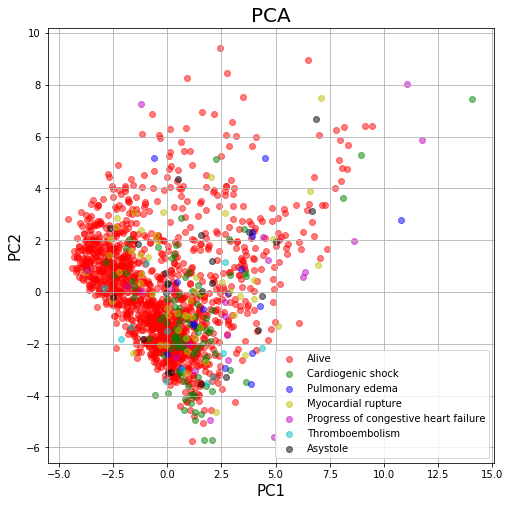

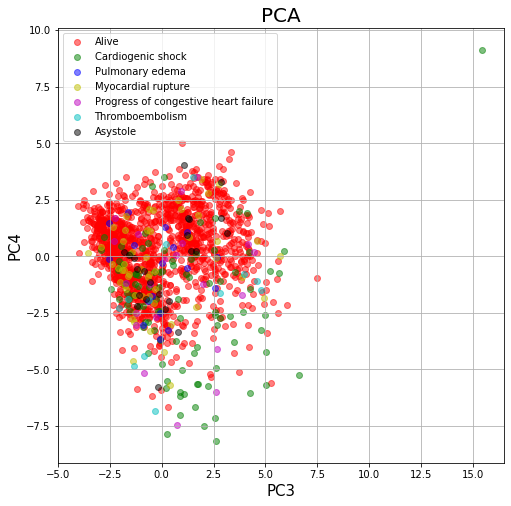

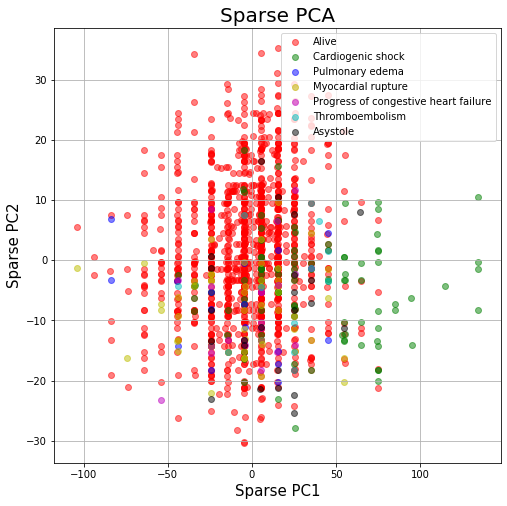

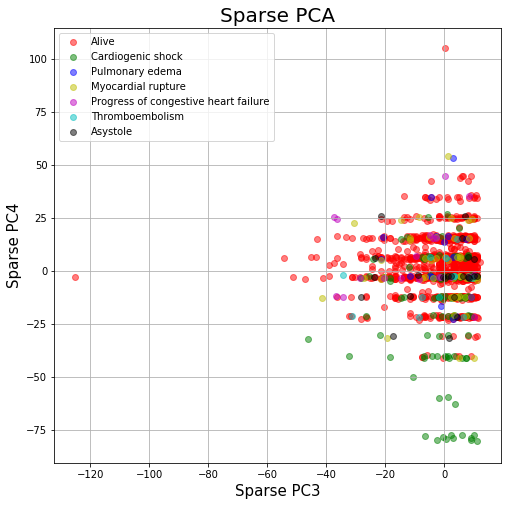

In [17]:
#eval, evec = PCA_EVD(center_data(X))
#print(eval.shape, evec.shape, X.shape)
#Project data
new_pca=PCA_skl(X)
make_2d_graphs(new_pca, Y, dimensions=[0,1], title="PCA", xlabel="PC1", ylabel="PC2")
make_2d_graphs(new_pca, Y, dimensions=[2,3], title="PCA", xlabel="PC3", ylabel="PC4")
new_sparsepca = SparsePCA_skl(X) #This takes some time ;)
make_2d_graphs(new_sparsepca, Y, dimensions=[0,1], title="Sparse PCA", xlabel="Sparse PC1", ylabel="Sparse PC2")
make_2d_graphs(new_sparsepca, Y, dimensions=[2,3], title="Sparse PCA", xlabel="Sparse PC3", ylabel="Sparse PC4")

(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)


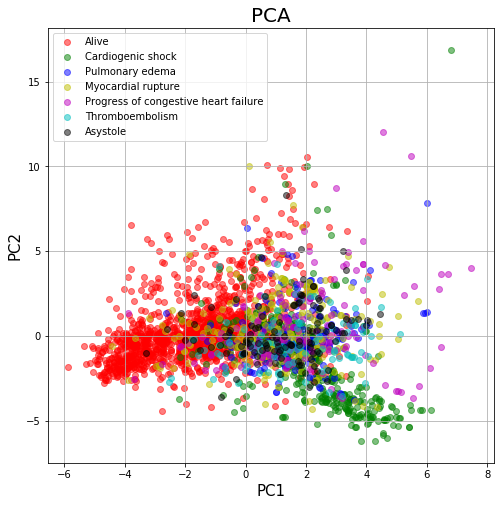

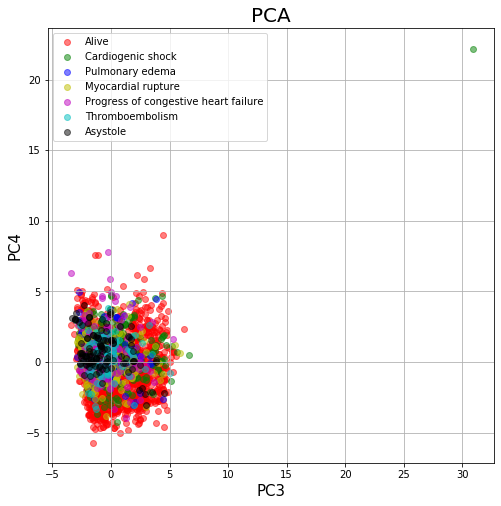

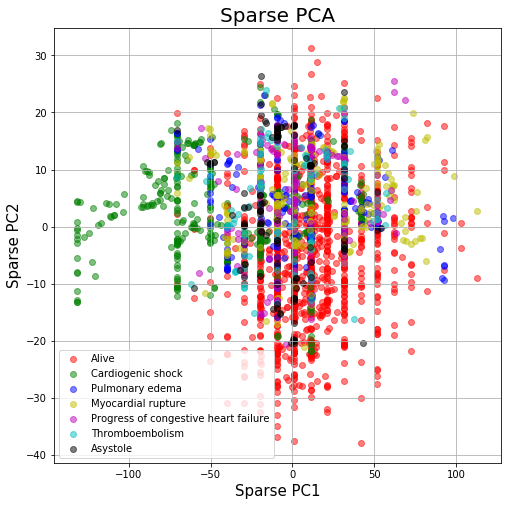

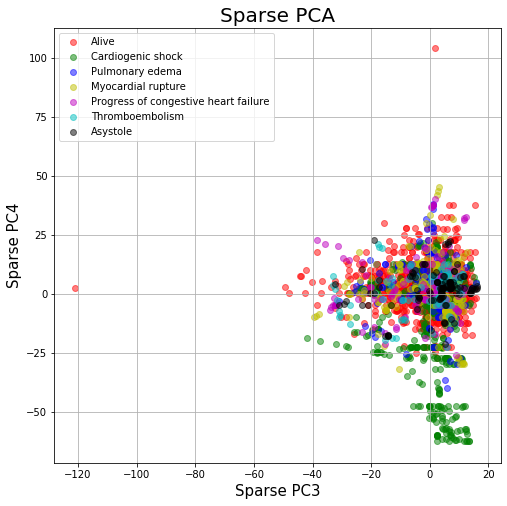

In [18]:
#Project data
new_pca=PCA_skl(x_train)
make_2d_graphs(new_pca, y_train, dimensions=[0,1], title="PCA", xlabel="PC1", ylabel="PC2")
make_2d_graphs(new_pca, y_train, dimensions=[2,3], title="PCA", xlabel="PC3", ylabel="PC4")
new_sparsepca = SparsePCA_skl(x_train) #This takes some time ;)
make_2d_graphs(new_sparsepca, y_train, dimensions=[0,1], title="Sparse PCA", xlabel="Sparse PC1", ylabel="Sparse PC2")
make_2d_graphs(new_sparsepca, y_train, dimensions=[2,3], title="Sparse PCA", xlabel="Sparse PC3", ylabel="Sparse PC4")

In [19]:
eval, evec = PCA_SVD(center_data(X))
print(eval.shape, evec.shape, X.shape)

(161,) (184, 161) (1572, 184)


In [20]:
from sklearn.decomposition import NMF

def NMF_data(data, n_components=None):
    if n_components is None:
        model = NMF(init='random', random_state=0)
    else:
        model = NMF(n_components=n_components, init='random', random_state=0)
    X_train_transformed = model.fit_transform(data)
    L = 0.5*model.reconstruction_err_**2
    components = model.components_
    return X_train_transformed

/home/alfred/.local/lib/python3.6/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(2646, 8) [[2.80335493e+00 1.64207033e-01 9.67030564e-01 ... 1.83890872e-01
  1.37804080e+01 0.00000000e+00]
 [2.18818726e+00 1.86597705e-02 7.52492793e-01 ... 1.65865992e-02
  0.00000000e+00 9.72297808e-02]
 [2.08348489e+00 9.16770544e-02 2.86698514e+00 ... 0.00000000e+00
  1.51921400e+01 1.41613513e-01]
 ...
 [2.78109956e+00 3.11896605e-01 1.46112633e-01 ... 1.50319679e-01
  2.92362812e+00 0.00000000e+00]
 [2.02133874e+00 9.45065396e-02 0.00000000e+00 ... 1.77162762e-01
  1.27755662e+01 6.85876279e-02]
 [2.57911060e+00 3.82243393e-01 0.00000000e+00 ... 3.48121392e-03
  7.77986777e-01 4.19216775e-02]]
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116

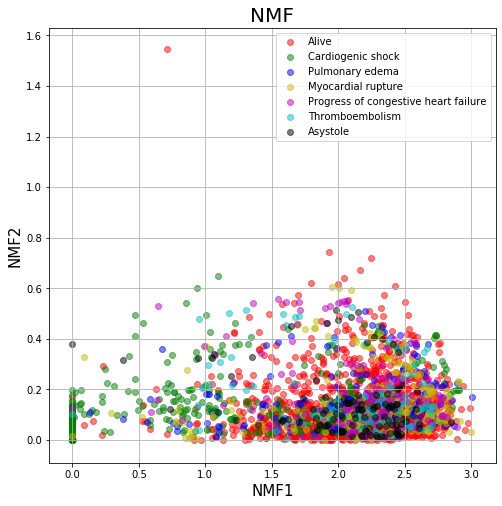

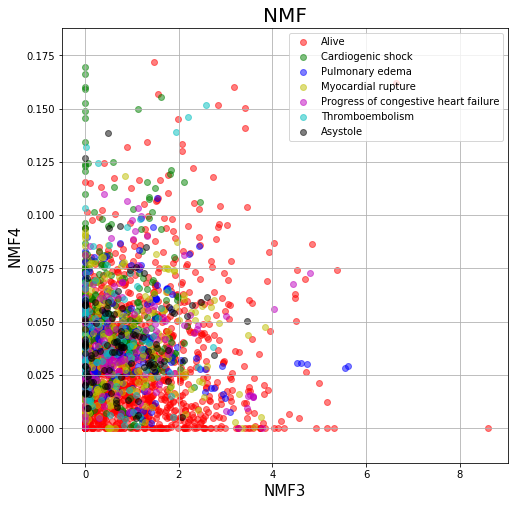

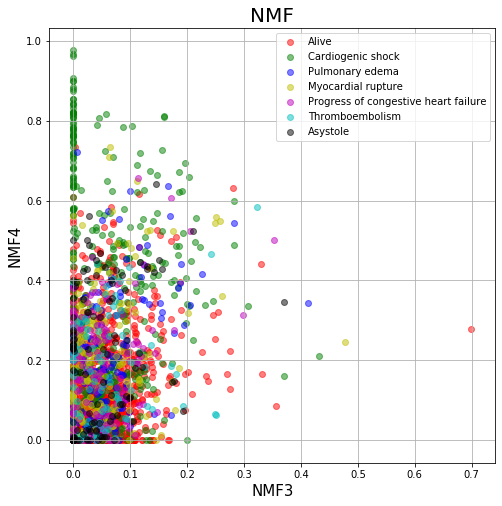

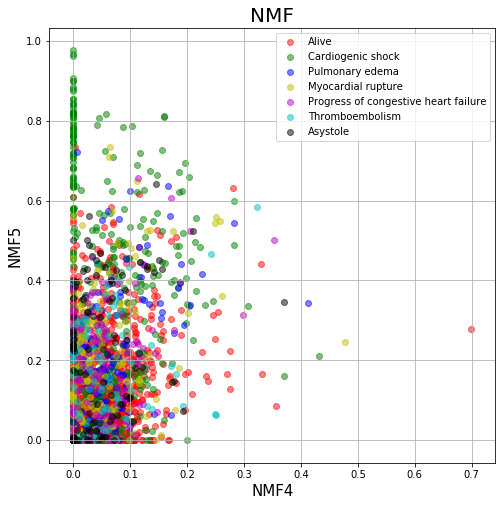

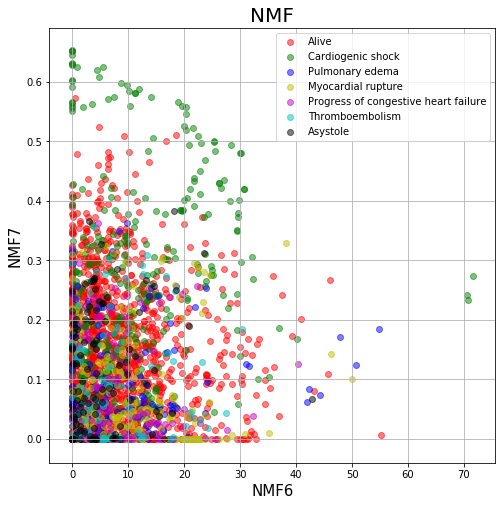

In [21]:
new_nmf=NMF_data(x_train, n_components=8)
print(new_nmf.shape, new_nmf)
make_2d_graphs(new_nmf, y_train, dimensions=[0,1], title="NMF", xlabel="NMF1", ylabel="NMF2")
make_2d_graphs(new_nmf, y_train, dimensions=[2,3], title="NMF", xlabel="NMF3", ylabel="NMF4")
make_2d_graphs(new_nmf, y_train, dimensions=[4,5], title="NMF", xlabel="NMF3", ylabel="NMF4")
make_2d_graphs(new_nmf, y_train, dimensions=[4,5], title="NMF", xlabel="NMF4", ylabel="NMF5")
make_2d_graphs(new_nmf, y_train, dimensions=[6,7], title="NMF", xlabel="NMF6", ylabel="NMF7")

In [22]:
import py_pcha

def aa_data(x, n_components=None):
    xx=x.to_numpy().T
    XC, S, C, SSE, varexpl = py_pcha.PCHA(xx,noc=n_components, delta=0.1)
    return S.T

(2646, 4) [[0.13625838 0.80330448 0.         0.06043713]
 [0.25929049 0.16503194 0.57567757 0.        ]
 [0.02592409 0.42580669 0.52686342 0.02140581]
 ...
 [0.23907056 0.58728472 0.         0.17364472]
 [0.37939716 0.44776275 0.1500846  0.02275549]
 [0.23164747 0.28247266 0.25640163 0.22947825]]
(1, 1323) (1, 1323)
(1, 410) (1, 410)
(1, 190) (1, 190)
(1, 274) (1, 274)
(1, 167) (1, 167)
(1, 100) (1, 100)
(1, 116) (1, 116)
(1, 1323) (1, 1323)
(1, 410) (1, 410)
(1, 190) (1, 190)
(1, 274) (1, 274)
(1, 167) (1, 167)
(1, 100) (1, 100)
(1, 116) (1, 116)


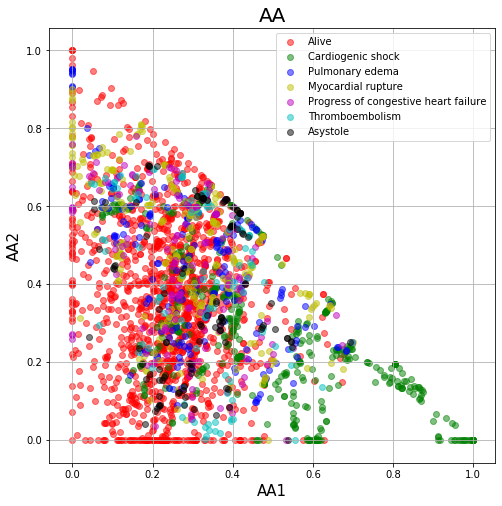

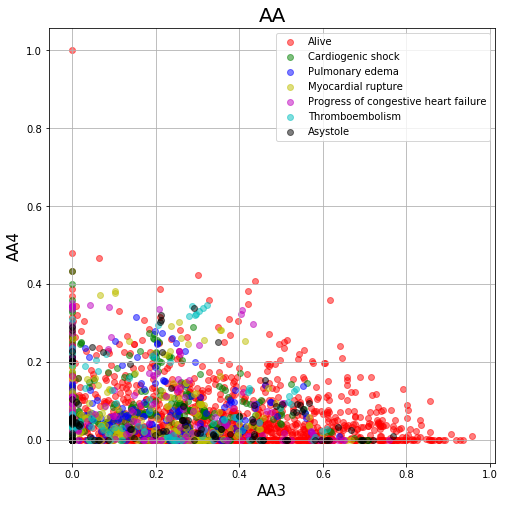

In [23]:
new_aa = aa_data(x_train, n_components=4)
print(new_aa.shape, new_aa)
make_2d_graphs(new_aa, y_train, dimensions=[0,1], title="AA", xlabel="AA1", ylabel="AA2")
make_2d_graphs(new_aa, y_train, dimensions=[2,3], title="AA", xlabel="AA3", ylabel="AA4")


In [24]:
from sklearn.decomposition import DictionaryLearning

def sc_data(x, n_components=4):
    model = DictionaryLearning(n_components=n_components, alpha=0.1, transform_alpha=0.1, max_iter=100, transform_max_iter=100, fit_algorithm='cd', transform_algorithm='lasso_cd')
    X_train_transformed = model.fit_transform(x)
    return X_train_transformed

(2646, 4) [[0.13625838 0.80330448 0.         0.06043713]
 [0.25929049 0.16503194 0.57567757 0.        ]
 [0.02592409 0.42580669 0.52686342 0.02140581]
 ...
 [0.23907056 0.58728472 0.         0.17364472]
 [0.37939716 0.44776275 0.1500846  0.02275549]
 [0.23164747 0.28247266 0.25640163 0.22947825]]
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)
(1323,) (1323,)
(410,) (410,)
(190,) (190,)
(274,) (274,)
(167,) (167,)
(100,) (100,)
(116,) (116,)


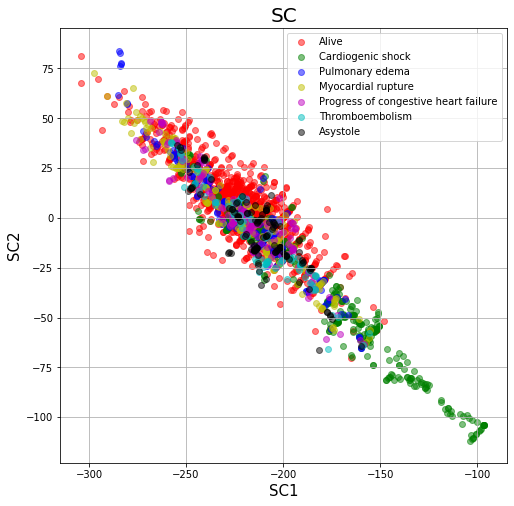

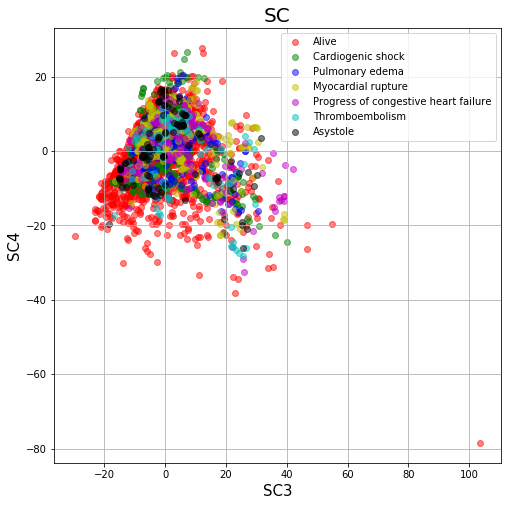

In [25]:
new_sc = sc_data(x_train, n_components=4)
print(new_aa.shape, new_aa)
make_2d_graphs(new_sc, y_train, dimensions=[0,1], title="SC", xlabel="SC1", ylabel="SC2")
make_2d_graphs(new_sc, y_train, dimensions=[2,3], title="SC", xlabel="SC3", ylabel="SC4")


In [26]:
##Trying 

In [27]:
X = sf_df_dum[x_cols]
Y = sf_df_dum[y_cols]
Y["DEAD"] = Y["LET_IS"].apply(lambda x: 1 if x > 0 else 0)
Y_dead = Y["DEAD"].to_numpy()
Y_dead = Y_dead.round().astype(int)
X = X.to_numpy()
print(X)

[[77.  1.  0. ...  0.  0.  0.]
 [55.  1.  0. ...  0.  0.  0.]
 [52.  1.  0. ...  0.  0.  0.]
 ...
 [70.  0.  0. ...  0.  0.  0.]
 [79.  0.  0. ...  0.  0.  0.]
 [63.  1.  0. ...  0.  0.  0.]]


/home/alfred/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline

inner_cv = KFold(n_splits=5, shuffle=True)
scores = []
scaler = preprocessing.StandardScaler()


for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X)):
    x_train_cv, x_test_cv = X[train_ids],X[test_ids]
    y_train_cv, y_test_cv = Y_dead[train_ids],Y_dead[test_ids]
    scaler.fit(X)
    #xtrain_cvsc = scaler.transform(x_train_cv)
    #x_test_cvsc = scaler.transform(x_test_cv)
    xtrain_cvsc = x_train_cv
    x_test_cvsc = x_test_cv
    smo = SMOTE()
    x_train, y_train = smo.fit_resample(xtrain_cvsc, y_train_cv)

    N_FEATURES_OPTIONS = [8, 10, 14, 26, 28, 30, 34, 38]

    param_grid = {
        'reduce_dim': [NMF(max_iter=20), PCA(iterated_power=15)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classifier__alpha': np.logspace(-4,4,50),
        "classifier__penalty": ["l1"]
    }

    model = Pipeline([('reduce_dim', PCA()),
                      ("classifier",SGDClassifier(max_iter=10000))
                    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, verbose=2, n_jobs=-1,scoring="roc_auc")

    cv_grid.fit(x_train, y_train)
    print(f'best estimator: {cv_grid.best_estimator_}')

    y_pred = cv_grid.predict(x_test_cvsc)
    plot_confusion_matrix(cv_grid, x_test_cvsc, y_test_cv)  
    scores.append(balanced_accuracy_score(y_pred,y_test_cv))

print(np.mean(scores))

Fitting 15 folds for each of 800 candidates, totalling 12000 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline

inner_cv = KFold(n_splits=5, shuffle=True)
scores = []
scaler = preprocessing.StandardScaler()


for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X)):
    x_train_cv, x_test_cv = X[train_ids],X[test_ids]
    y_train_cv, y_test_cv = Y_dead[train_ids],Y_dead[test_ids]
    scaler.fit(X)
    #xtrain_cvsc = scaler.transform(x_train_cv)
    #x_test_cvsc = scaler.transform(x_test_cv)
    xtrain_cvsc = x_train_cv
    x_test_cvsc = x_test_cv
    smo = SMOTE()
    x_train, y_train = smo.fit_resample(xtrain_cvsc, y_train_cv)

    N_FEATURES_OPTIONS = [8, 10, 14, 26, 28, 30, 34, 38]

    param_grid = {
        'classifier__alpha': np.logspace(-4,4,50),
        "classifier__penalty": ["l1", "elastic_net"]
        "classifier__"
    }

    model = Pipeline([
                      ("classifier",SGDClassifier(max_iter=10000))
                    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, verbose=2, n_jobs=-1,scoring="roc_auc")

    cv_grid.fit(x_train, y_train)
    print(f'best estimator: {cv_grid.best_estimator_}')

    y_pred = cv_grid.predict(x_test_cvsc)
    plot_confusion_matrix(cv_grid, x_test_cvsc, y_test_cv)  
    scores.append(balanced_accuracy_score(y_pred,y_test_cv))

print(np.mean(scores))